In [19]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from pytorch_lightning import Trainer

from libs.seq2seq_model import RNNModel
from libs.lfgenerator import Shift

In [20]:
def truncatedloss(y, y_hat, loss=torch.nn.MSELoss(), t=10):
    truncated_loss = 0
    length = y.shape[-2]

    for i in range(length - t, length):
        truncated_loss += loss(y[:, i, :], y_hat[:, i, :])

    return truncated_loss

In [21]:
model = RNNModel.load_from_checkpoint("./runs/tanhRNN_tcw/version_0/checkpoints/tanhRNN_tcw-epoch=04-valid_loss=6.11e-02.ckpt")

In [22]:
test_t=80

id = torch.zeros(1,test_t,1)
id[0,0,0] = 1.0

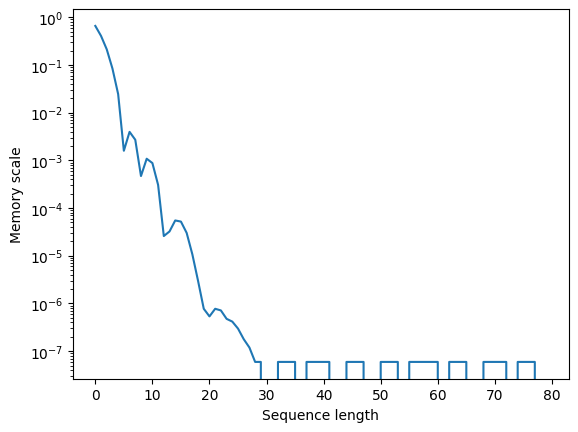

In [23]:
# model.return_sequence = True
output = model(id)[0,:].detach().cpu().numpy()
output -= output[-1]
output = np.abs(output)
plt.plot(output)
plt.xlabel("Sequence length")
plt.ylabel("Memory scale")
plt.yscale("log")
# plt.xscale("log")

# plt.title("Tcw Decay is faster than exponential")

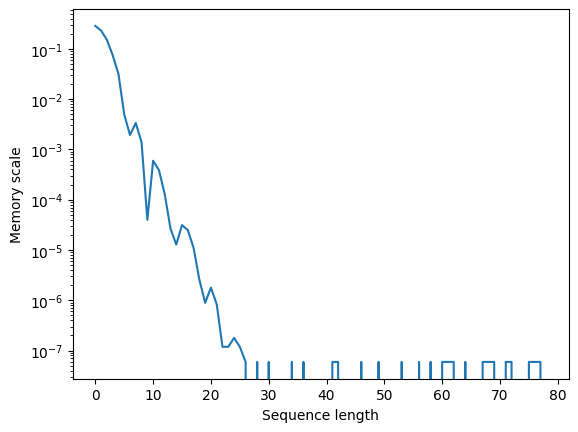

In [24]:
id = torch.ones(1,test_t,1)

output = model(id)[0,:].detach().cpu().numpy()
output = np.squeeze(output)
memory = output[1:] - output[:-1]
memory = np.abs(memory)
plt.plot(memory)
plt.xlabel("Sequence length")
plt.ylabel("Memory scale")
plt.yscale("log")
# plt.xscale("log")

# plt.title("Decay is faster than exponential")